In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Important libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load Dataset

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Iris Classification/Iris.csv')

# Exploring Dataset

In [7]:
df.head()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,5.1,3.5,1.4,0.2
1,Iris-setosa,4.9,3.0,1.4,0.2
2,Iris-setosa,4.7,3.2,1.3,0.2
3,Iris-setosa,4.6,3.1,1.5,0.2
4,Iris-setosa,5.0,3.6,1.4,0.2


In [9]:
species = df['Species'].value_counts()
species

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [10]:
df.dtypes

,0
Species,object
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64


In [11]:
df.shape

(150, 5)

In [12]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.isnull().sum()

,0
Species,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0


# Data Visualization

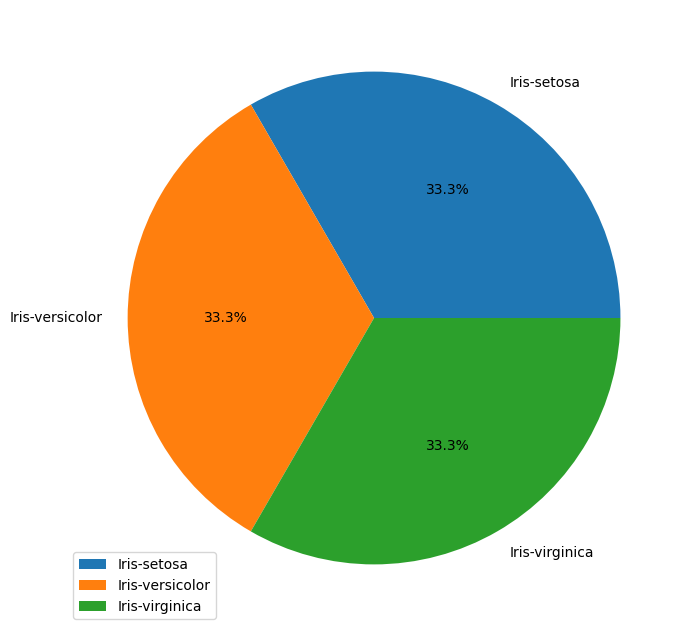

In [14]:
plt.figure(figsize=(8,8))
plt.pie(species, labels = species.index, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

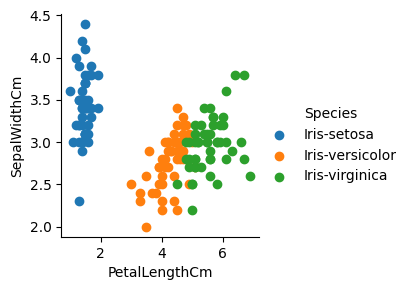

In [16]:
sns.FacetGrid(df, hue ='Species').map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend()
plt.show()

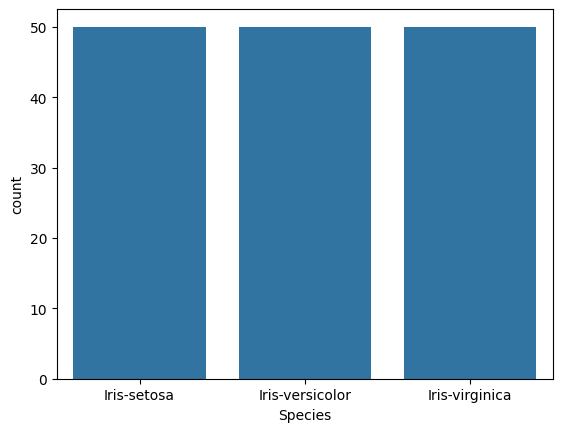

In [17]:
sns.countplot(x='Species', data=df)
plt.show()


# Train test Split

In [18]:
X = df.drop('Species', axis = 1) # grabs everything else but 'species'

# Create target variable
y = df['Species'] # y is the column we're trying to predict

## Standard scaling

In [19]:
# Standardize the features
scaler = StandardScaler().fit(X)
x_transform = scaler.transform(X)

## Label Encoding

In [20]:
# Encode the target variable
lb_encoder = LabelEncoder()
y_encoded = lb_encoder.fit_transform(y)

In [21]:
# One-hot encode the target labels
y_onehot = tf.keras.utils.to_categorical(y_encoded)

In [22]:
#spliting the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(x_transform, y_onehot, test_size = 0.20, random_state = 42)

# Model Building

In [23]:
#Building a Fully connected neural network (FCN) mode

model = Sequential()

#1st hidden layer
model.add(Dense(50, input_dim = 4, activation = 'relu'))

#2nd Layer
model.add(Dense(100, activation = 'relu'))

#3rd Layer
#softmax activation function is use for Categorial Data
# the output values represent probabilities of each category
model.add(Dense(3, activation = 'softmax'))

#compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,653 (22.08 KB)

 Trainable params: 5,653 (22.08 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [24]:
model.fit(X_train, y_train, epochs = 30, batch_size = 10)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5553 - loss: 1.0516
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.7574 
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8222 - loss: 0.5949 
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.5249 
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4278 
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8215 - loss: 0.4060 
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.3334 
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.3154 
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.2802 
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9089 - loss: 0.2417 
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8849 - loss: 0.2187 
Epoch 12/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

# Model Evaluation

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0409
Loss: 0.040863096714019775
Accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


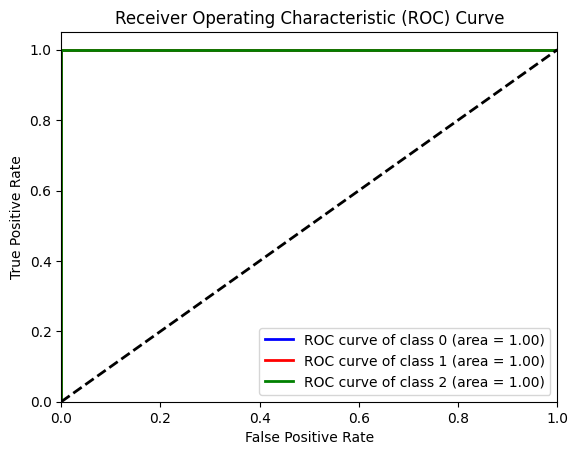

In [27]:
# Binarize the output
y_test_bin = label_binarize(y_test.argmax(axis=1), classes=[0, 1, 2])
y_pred_proba = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


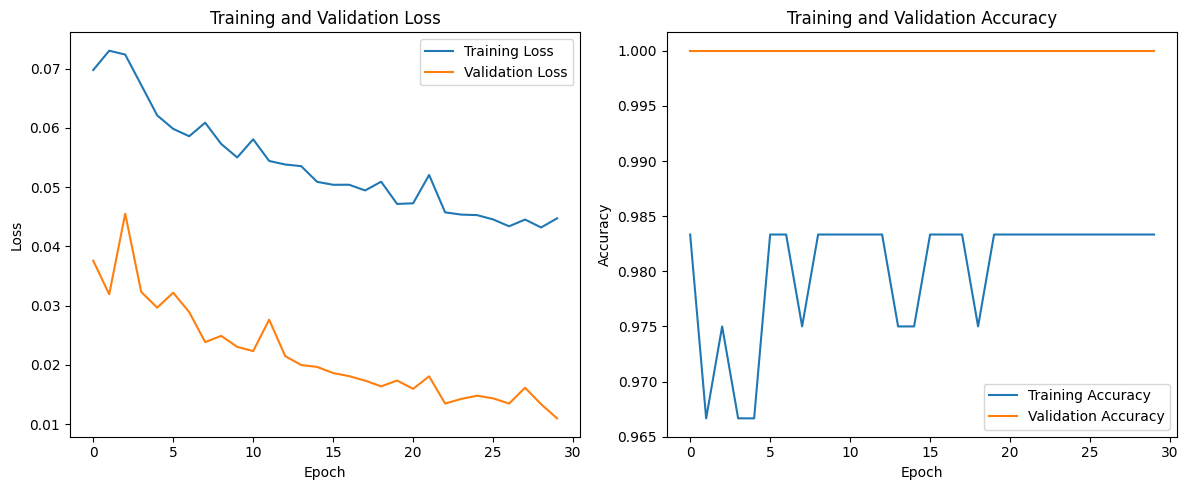

In [28]:
# Initialize lists to store training and validation loss and accuracy
train_loss = []
val_loss = []
train_acc = []
val_acc = []

# Fit the model and record the metrics for each epoch
for epoch in range(30):
  history = model.fit(X_train, y_train, epochs=1, batch_size=10, validation_data=(X_test, y_test), verbose=0)
  train_loss.append(history.history['loss'][0])
  val_loss.append(history.history['val_loss'][0])
  train_acc.append(history.history['accuracy'][0])
  val_acc.append(history.history['val_accuracy'][0])

# Plot the learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


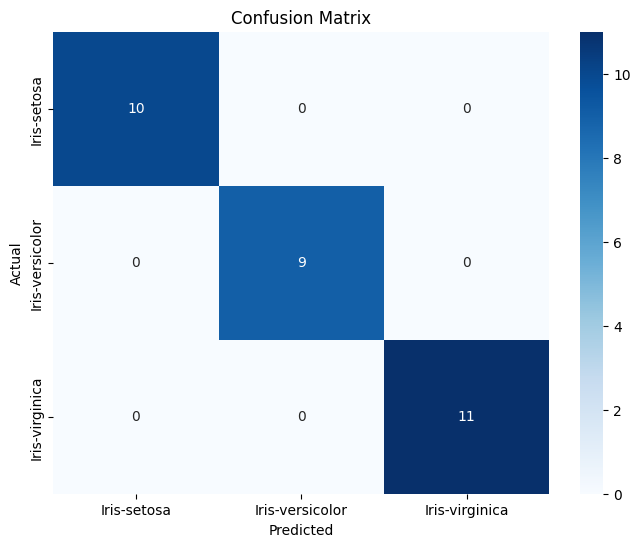

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [29]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb_encoder.classes_, yticklabels=lb_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true_classes, y_pred_classes, target_names=lb_encoder.classes_))


# Conclusion

In this project, we explored the Iris dataset, a classic and widely-used dataset in the field of machine learning. We employed a Fully Connected Neural Network (FCN) to classify the Iris species based on four features: sepal length, sepal width, petal length, and petal width. Through careful data preprocessing, model training, and evaluation, we achieved an impressive accuracy of 98%.